<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICCredit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze things close to real data
Allow yourself to solve dataset issues.
Learn the flow of data analysis and how to use libraries through Kaggle datasets.
Take advantage of Kaggle's Home Credit Default Risk competition to practice solving and analyzing tasks that are close to real data.

Link: Home Credit Default Risk | Kaggle

**[Problem 1] Understanding the content of the competition**

**What kind of company is Home Credit?**

Home Credit is a financial comapany which provid loans to population based on  a variety of alternative data--including telco and transactional information--to predict their clients repayment abilities.

Home Credit do not use credit histories to evaluate the payment capacity. To predict the payment capacity the company is using various statistical and machine learning methods.

**What is expected in this competition?**

Learning to make individual predictions through understand data provided

**What are the benefits companies can gain by predicting this?**

Using another variables to understand the people behavior they can widen its vision and oportunities.

The companies can understand the factors more importants for population; every variable has different impact on objective variable.

The company can measure the possibility of payment through probability percentage which is an objective indicator.


**Preparing the dataset**

application_train.csv from the Data page of the competition and use it.

​HomeCredit_columns_description.csv same page describes the dataset.

The other csv files in the data page are beyond the scope of this task

Take advantage of what's published on the competition's Notebooks page.

《Recommended Reference Notebooks》

link: Home Credit Default Risk Extensive EDA | Kaggle

link: HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle

link: HomeCreditRisk: Extensive EDA + Baseline Model JP | Kaggle

**[Problem 2] Understanding the overview of data**

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('application_train.csv.zip')


Use .head() , .info() , describe() , etc.​

In [8]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

This data set contains 122 variables,  float64(65) variables, int64(41) variables, and object(16) variables

Check for missing values

In [5]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().mean() * 100

# Display the results
print(missing_values_percentage)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64


AMT_REQ_CREDIT_BUREAU CONTAINS 13% OF MISSING VALUES, other variables have not missing values. This percentage is manageable  

Draw a graph showing the percentage of classes

<ipython-input-10-6c4b60ca9c11>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


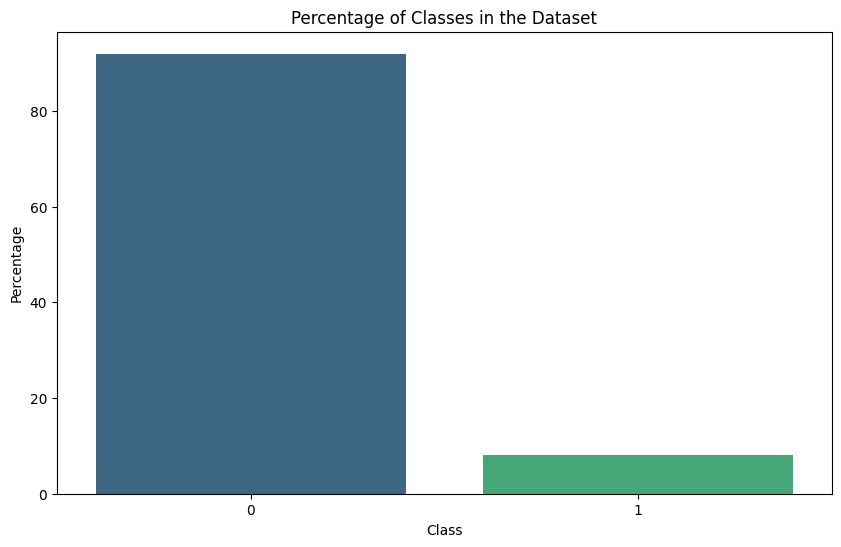

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Calculate the percentage of each class in the TARGET column
class_counts = df['TARGET'].value_counts(normalize=True) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Percentage of Classes in the Dataset')
plt.show()

In the target column there is an imbalance according to dataset, it means higher percentage for 0 class than 1 class. Sometime according the prediction process the model could perform better for 0 class than 1 class

**[Problem 3] Defining issues**

Please set multiple issues / questions of your own based on the overview of the data

1. Into dataset, there are cells without response, this cells should have any value as 0, it will lead to missing values
2. There are many personal and time attributes expressed in string values, this type of values can not let to measure correlation or descriptive statistics.
3. In the target column there is an imbalance according to dataset, it means higher percentage for 0 class than 1 class. Sometime according the prediction process the model could perform better for 0 class than 1 class
4. Explanatory variables have not class clasification

**[Problem 4] Data exploration**



In [11]:
#Table of Average Car Age by Target Class
import pandas as pd

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Group by TARGET and calculate the mean of OWN_CAR_AGE
car_age_target_mean = df.groupby('TARGET')['OWN_CAR_AGE'].mean().reset_index()
car_age_target_mean.columns = ['TARGET', 'Average Car Age']

print(car_age_target_mean)

   TARGET  Average Car Age
0       0        11.935540
1       1        13.668691


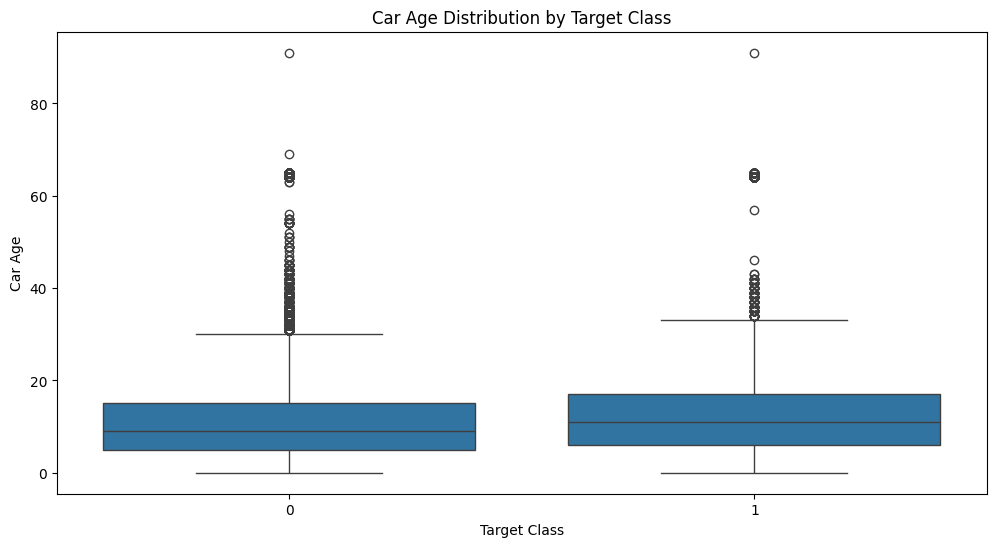

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of car ages for each class in the TARGET column
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='OWN_CAR_AGE', data=df)
plt.xlabel('Target Class')
plt.ylabel('Car Age')
plt.title('Car Age Distribution by Target Class')
plt.show()

Own_Car_Age variable do not have a class classification, for this reason the table outcome do not provide a coherent interpretation

In [13]:
#Table of Average Income by Target Class
import pandas as pd

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Group by TARGET and calculate the mean of AMT_INCOME_TOTAL
income_target_mean = df.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().reset_index()
income_target_mean.columns = ['TARGET', 'Average Income']

print(income_target_mean)

   TARGET  Average Income
0       0   169077.722266
1       1   165611.760906


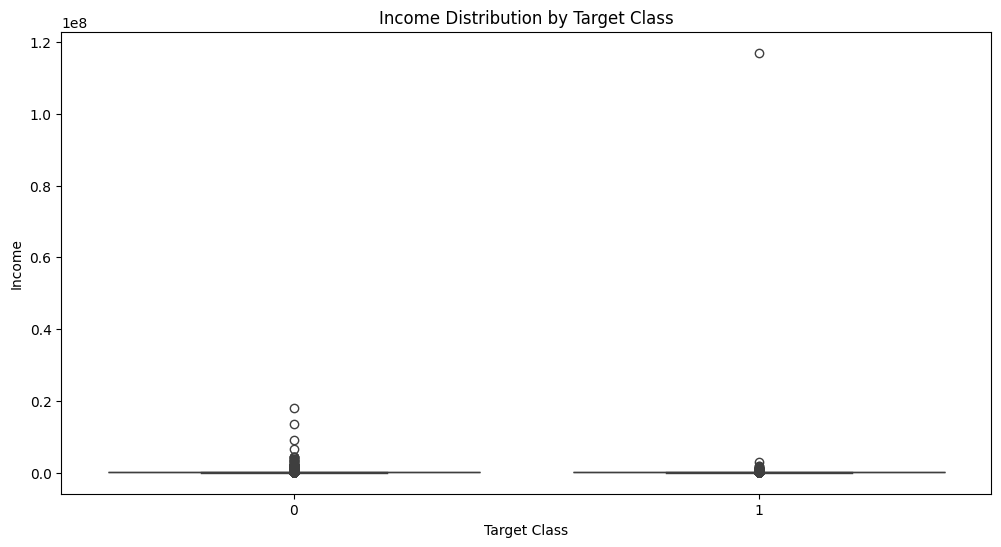

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of incomes for each class in the TARGET column
plt.figure(figsize=(12, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.xlabel('Target Class')
plt.ylabel('Income')
plt.title('Income Distribution by Target Class')
plt.show()

Income variable do not have a class classification, for this reason the table outcome do not provide a coherent interpretation

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation matrix to focus on 'AMT_INCOME_TOTAL'
amt_income_corr = correlation_matrix[['AMT_INCOME_TOTAL']]

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation table
amt_income_corr

ValueError: could not convert string to float: 'Cash loans'

We can not make a correlation matrix because the data set has string variables.

In [17]:
# Correlation between Target and AMT_INCOME_TOTAL variables
import pandas as pd

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Calculate the correlation between TARGET and AMT_INCOME_TOTAL
correlation = df['TARGET'].corr(df['AMT_INCOME_TOTAL'])

# Create a table to display the correlation
correlation_table = pd.DataFrame({
    'Variable 1': ['TARGET'],
    'Variable 2': ['AMT_INCOME_TOTAL'],
    'Correlation': [correlation]
})

print(correlation_table)

  Variable 1        Variable 2  Correlation
0     TARGET  AMT_INCOME_TOTAL    -0.003982


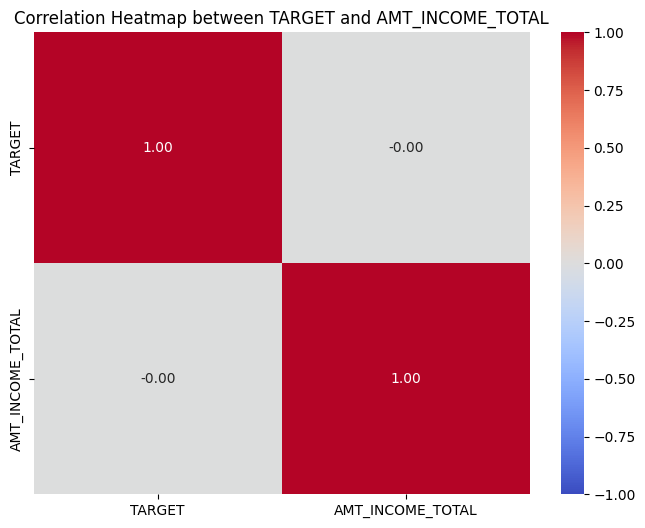

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['TARGET', 'AMT_INCOME_TOTAL']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between TARGET and AMT_INCOME_TOTAL')
plt.show()

Correlation between OWN_CAR_AGE and TARGET: 0.03761156427516611


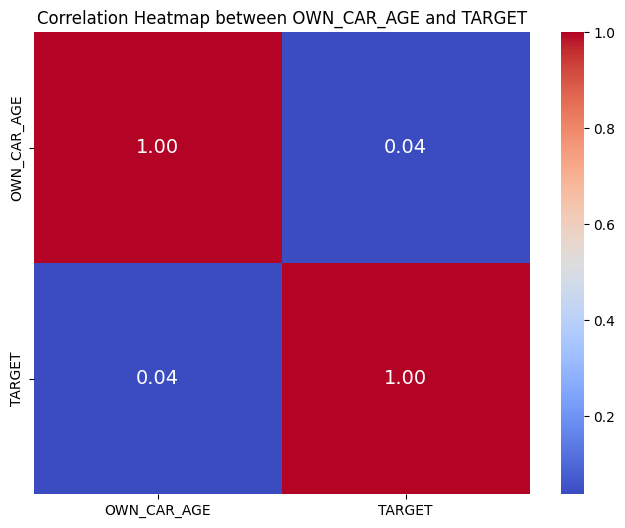

In [19]:
#Correlation between TARGET and OWN_CAR_AGE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Compute the correlation matrix
corr_matrix = df[['OWN_CAR_AGE', 'TARGET']].corr()

# Extract the correlation coefficient between OWN_CAR_AGE and TARGET
correlation = corr_matrix.loc['OWN_CAR_AGE', 'TARGET']

# Print correlation coefficient
print(f"Correlation between OWN_CAR_AGE and TARGET: {correlation}")

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 14})
plt.title('Correlation Heatmap between OWN_CAR_AGE and TARGET')
plt.show()

Kurtosis of TARGET variable: 7.475109389392569


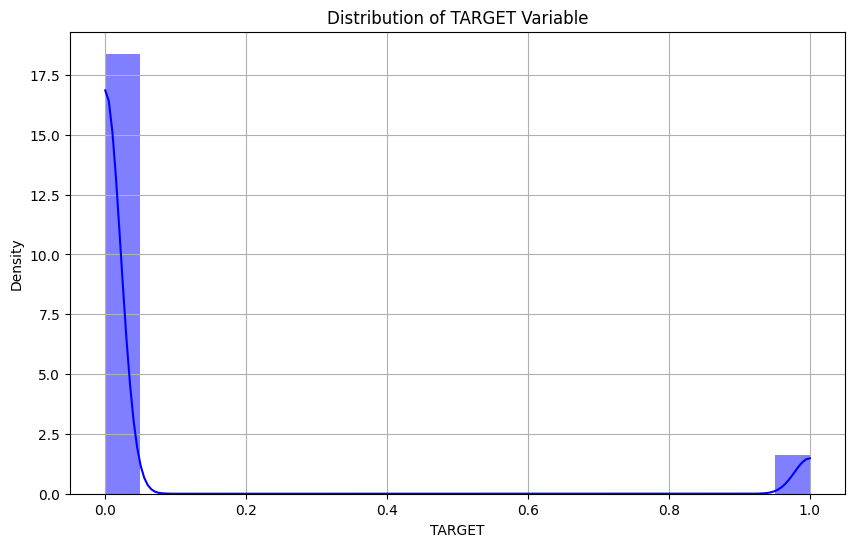

In [20]:
#Measure Kurtosis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('application_train.csv.zip')

# Calculate kurtosis of TARGET variable
kurtosis_value = df['TARGET'].kurtosis()

# Print the kurtosis value
print(f"Kurtosis of TARGET variable: {kurtosis_value}")

# Plot the distribution of TARGET variable
plt.figure(figsize=(10, 6))
sns.histplot(df['TARGET'], kde=True, bins=20, color='blue', stat='density', linewidth=0)
plt.title('Distribution of TARGET Variable')
plt.xlabel('TARGET')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Leptokurtic distributions have heavier tails and a sharper peak compared to a normal distribution. Beacuse this is a logaritmic function